<a href="https://colab.research.google.com/github/Moiches/PCA_ONE/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as plt
print(plt.__version__)



3.7.1


In [ ]:
pip install --upgrade matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
# PCA PRINCIPAL COMPONENT ANALYSIS


PCA PRINCIPAL COMPONENT ANALYSIS ES UNA TECNICA CAPAZ DE REDUCIR LAS DIMESIONES DE UN DATASET Y PASAR DE M DIMESIONES A  N DIMESIONES, DONDE M ES MAS PEQUEÑO QUE N, MABTENIENDO EN PRIMER LUGAR A LAS VARIABLES QUE GUARDAN ENTRE SI UNA MAYOR VARIANZA ENTRE SI O MEJOR DICHO COVARIANZA

In [ ]:
# DATOS
x = np.random.rand(100,2)
# Generar una matriz de 10x4 con números enteros aleatorios en el rango [0, 10)
y = np.random.randint(0, 10, size=(10, 4))


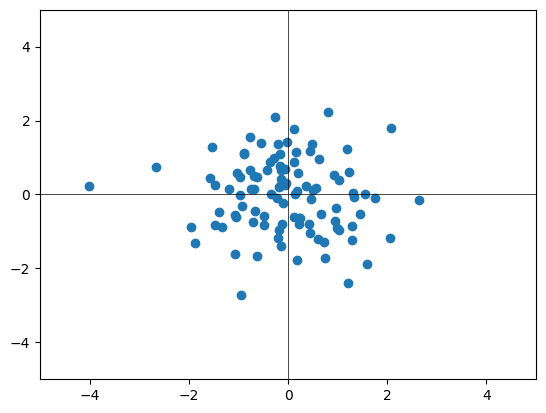

In [ ]:
plt.axhline(y=0, color='black', linewidth = 0.5)
plt.axvline(0,color = 'black', linewidth = 0.5)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.scatter(x[:,0],x[:,1])
plt.show()

In [ ]:
def standarize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    x_std = (data - mean) / std
    return x_std


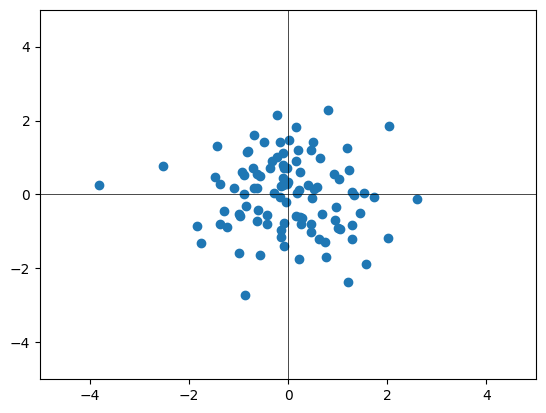

In [ ]:
x_std = standarize_data(x)

plt.axhline(y=0, color='black', linewidth = 0.5)
plt.axvline(0,color = 'black', linewidth = 0.5)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.scatter(x_std[:,0],x_std[:,1])
plt.show()


In [ ]:
covariance_matrix = np.cov(x_std.T)
print(covariance_matrix)

[[ 1.01010101 -0.07545014]
 [-0.07545014  1.01010101]]


In [ ]:
# EIGENVECTORES REPRESENTAN LAS DIRECCIONES EN EL ESPACIO DONDE LOS DATOS VARIAN MAS
# POR LO QUE DEBEN DE SER ORTGONALES ENTRE SI EN EL ESPACIO DE CARACTERISTICAS

def compute_eigenvalues_eigenvectors(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    return eigenvalues, eigenvectors
eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(covariance_matrix)
print(eigenvalues)
print(eigenvectors)

[1.08555115 0.93465087]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


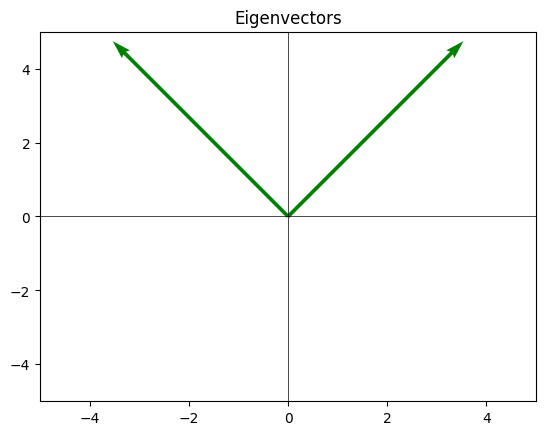

In [ ]:
for eigenvector in eigenvectors:
  plt.quiver(0,0,eigenvector[0],eigenvector[1],scale=2,color='g')
plt.title('Eigenvectors')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.axhline(y=0, color='black', linewidth = 0.5)
plt.axvline(0,color = 'black', linewidth = 0.5)
plt.show()

In [ ]:
eigenvectors

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [ ]:
np.dot(eigenvectors[:,0],eigenvectors[:,1])

0.0

In [ ]:
def sort_eigenvalues_eigenvectors(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors


In [ ]:
eigenvalues, eigenvectors = sort_eigenvalues_eigenvectors(eigenvalues, eigenvectors)
print(eigenvalues)
print(eigenvectors)

[1.08555115 0.93465087]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [ ]:
def select_eigenvectors(eigenvectors, k):
    return eigenvectors[:, :k]

In [ ]:
selected_eigenvectors = select_eigenvectors(eigenvectors, 1)
print(selected_eigenvectors)

[[ 0.70710678]
 [-0.70710678]]


Text(0.5, 1.0, 'Eigenvectors Selected')

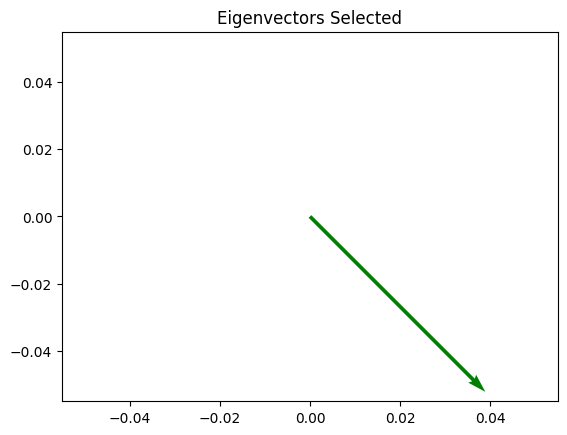

In [ ]:
for eigenvector in selected_eigenvectors.T:
  plt.quiver(0,0,eigenvector[0],eigenvector[1],scale=2,color='g')
plt.title('Eigenvectors Selected')

In [ ]:
def transform_data(data, eigenvectors):
    return np.dot(data, eigenvectors)

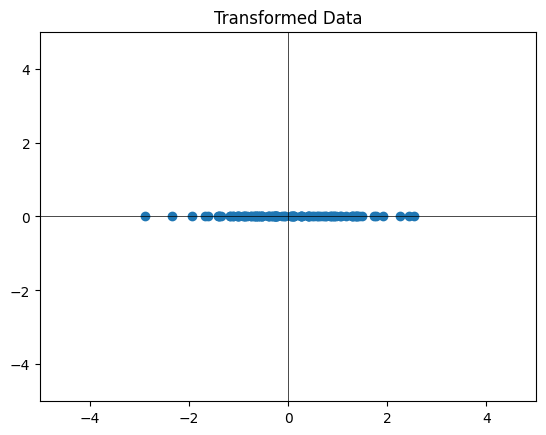

In [ ]:
x_transformed = transform_data(x_std, selected_eigenvectors)
plt.scatter(x_transformed[:,0],np.zeros(x_transformed.shape[0]))
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.axhline(y=0, color='black', linewidth = 0.5)
plt.axvline(0,color = 'black', linewidth = 0.5)
plt.title('Transformed Data')
plt.show()